## **1. Download and Explore our data**

In [1]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras.applications import VGG16, imagenet_utils
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.efficientnet import EfficientNetB7
from tensorflow.keras.applications.inception_v3 import InceptionV3

##for reduce features.
from tensorflow import keras

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import random
import tqdm
import os
from scipy.stats import zscore
from scipy.stats import pearsonr

### **Loading our data and it's labels into a dataframe**

There are many ways we can do this, this way is relatively simple to follow.

In [2]:
met_control = pd.read_csv("../../Met/met_rr_control_named.csv")
met_control

,NSFTV_ID,Treatment,hexanoic acid,alanine,valine,urea,ethanolamine,leucine,glycerol,nicotinic acid,...,adenosine,trehalose,maltose,sophorose,melibiose,isomaltose,galactinol,phosphoric acid,Sucrose,Raffinose
0,NSFTV_1,Control,0.073463,0.099932,0.004720,1.853639,-0.269819,-0.055739,0.510914,0.391473,...,0.046634,-0.450524,-0.308289,-0.063850,0.423776,0.314369,0.158955,-0.140715,0.402484,-1.440777
1,NSFTV_102,Control,-0.015095,0.209659,0.127870,-0.101918,-0.437334,0.239351,0.055266,-0.028396,...,0.121284,-0.065042,0.368929,-0.008045,0.399713,-0.264498,-0.061229,-0.235017,-0.741653,1.070465
2,NSFTV_103,Control,0.160103,0.633219,0.151433,-0.387669,0.734534,0.257577,0.296091,0.659027,...,0.361614,-0.095921,1.005878,0.057135,0.015705,-0.009189,0.044330,0.834154,0.303034,-0.603933
3,NSFTV_104,Control,-0.013302,1.181448,2.265878,-0.359049,2.272740,2.541394,1.046026,0.542261,...,0.331713,-0.479455,1.581037,0.250587,-0.221493,2.584905,0.217831,1.466190,-0.346015,-2.386452
4,NSFTV_105,Control,0.328212,0.459086,0.923531,-0.247979,1.909945,0.371542,0.246153,-0.041397,...,0.674103,0.312100,0.409481,0.196645,-0.313199,0.029189,0.038495,1.258600,-0.338108,-0.278003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,NSFTV_90,Control,0.154189,-0.032636,-0.143583,0.443690,-0.013267,-0.008876,-0.090771,-0.303796,...,-0.009423,-0.107175,-0.492381,0.162906,0.192797,-0.192028,-0.061853,0.285540,-0.293308,1.110043
158,NSFTV_92,Control,-0.028981,-0.115577,0.092292,0.029275,0.301546,0.119252,-0.139018,-0.114555,...,-0.014101,0.000017,0.187861,0.185697,-0.062153,0.097698,-0.018249,-1.020564,0.129552,0.339379
159,NSFTV_93,Control,-0.005575,-0.058799,0.191081,0.850514,0.222220,0.368702,0.316836,-0.092219,...,-0.028387,0.096424,-0.680553,0.072835,-0.321447,-0.169982,-0.083892,-0.118708,-0.248154,-0.093230
160,NSFTV_96,Control,0.153888,0.111901,-0.248869,-0.651881,0.206074,-0.088784,0.612490,-0.194678,...,0.152969,-0.355506,-0.008856,-0.335311,-0.224398,-0.036093,-0.095945,-0.003359,-0.093124,-1.008269


,labels,NSFTV_ID
0,1.139456,NSFTV_1
1,0.123255,NSFTV_102
2,0.660351,NSFTV_103
3,2.332881,NSFTV_104
4,0.548978,NSFTV_105


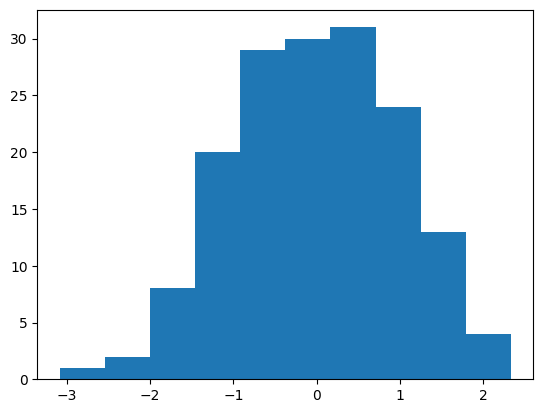

In [3]:
labels = zscore(np.array(met_control.glycerol)) #normalization
plt.hist(labels)
lines = np.array(met_control.NSFTV_ID)
# print(lines)

dff = pd.DataFrame({
        "labels": labels,
        "NSFTV_ID": lines
    })

dff.head()

In [4]:
dataset_path = "../../SNPimg/dataset/"
chr_path = os.listdir("../../SNPimg/dataset/NSFTV_1/")
base_df = dff.assign(dataset_path=dataset_path)
base_df.head()

,labels,NSFTV_ID,dataset_path
0,1.139456,NSFTV_1,../../SNPimg/dataset/
1,0.123255,NSFTV_102,../../SNPimg/dataset/
2,0.660351,NSFTV_103,../../SNPimg/dataset/
3,2.332881,NSFTV_104,../../SNPimg/dataset/
4,0.548978,NSFTV_105,../../SNPimg/dataset/


## **2. Load our pretrained VGG16 Model** 

In [5]:
# model = EfficientNetB7(weights='imagenet', include_top=False)
# model.summary()

In [6]:
# model = ResNet50(weights='imagenet', include_top=False)
# model.summary()

In [5]:
model = InceptionV3(weights='imagenet', include_top=False)
model.summary()

87910968/87910968 [==============================] - 6s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)           

## **What exactly are we doing?**

We're taking the output of the last CONV-POOL layer (see below). 

The output shape at this layer is **7 x 7 x 512**

![feat_extraction](https://appliedmachinelearning.files.wordpress.com/2021/05/ef54e-vgg16.png?w=612&zoom=2)
Image referenced from [here](https://appliedmachinelearning.blog/2019/07/29/transfer-learning-using-feature-extraction-from-trained-models-food-images-classification/)

### **Store our Image Paths and Label names**

## **3. Extract our Features using VGG16**

In [6]:
base_df.head()

,labels,NSFTV_ID,dataset_path
0,1.139456,NSFTV_1,../../SNPimg/dataset/
1,0.123255,NSFTV_102,../../SNPimg/dataset/
2,0.660351,NSFTV_103,../../SNPimg/dataset/
3,2.332881,NSFTV_104,../../SNPimg/dataset/
4,0.548978,NSFTV_105,../../SNPimg/dataset/


In [7]:
image_pathss = [base_df["dataset_path"] + base_df["NSFTV_ID"] + "/" + chr_path[i] for i in range(12)]  ####### here we can include multiple chromosome setting.
# print(image_paths)
print(np.array(image_pathss).shape)

(12, 162)


In [8]:
image_pathss[0][0]

'../../SNPimg/dataset/NSFTV_1/Chr5_snp_images.png'

In [9]:
image_features = []

# loop over each batch

for image_paths in image_pathss:
  # print(image_paths)
  batch_size = 162
  image_features_chr = []
  image_labels = []

  for i in range(0, len(image_paths)//batch_size):
    batch_paths = image_paths[i:i + batch_size]
    batch_labels = dff["NSFTV_ID"][i:i + batch_size]
    batch_images = []
    for image_path in batch_paths:
      image = load_img(image_path, target_size = (244, 244)) #image is still in PIL format. Need to convert into np.array
      image = img_to_array(image)
      # We expand the dimensions and then subtract the mean RGB pixel intensity of ImageNet
      image = np.expand_dims(image, axis=0) # add one dim in axis=0
      image = imagenet_utils.preprocess_input(image) #normalization based on ImageNet.
      # print(np.min(image), np.max(image))
      image = image/127.5-1.0 #scale into range (-1,1)
      # print(np.min(image), np.max(image))
      batch_images.append(image)

    batch_images = np.vstack(batch_images) #looks like no need to expand in the before lines.
    features = model.predict(batch_images, batch_size = batch_size)
    print(features.shape)
    features = np.reshape(features,(-1, features.shape[1]*features.shape[2]*features.shape[3]))
    print(features.shape)
    # # store our features and corresponding labels
    image_features_chr.append(features)
    image_labels.append(batch_labels)

  image_features.append(np.array(image_features_chr))  

2023-10-31 20:47:41.073637: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 4s 4s/step
(162, 6, 6, 2048)
(162, 73728)
1/1 [==============================] - 1s 596ms/step
(162, 6, 6, 2048)
(162, 73728)
1/1 [==============================] - 1s 660ms/step
(162, 6, 6, 2048)
(162, 73728)
1/1 [==============================] - 1s 642ms/step
(162, 6, 6, 2048)
(162, 73728)
1/1 [==============================] - 1s 649ms/step
(162, 6, 6, 2048)
(162, 73728)
1/1 [==============================] - 1s 587ms/step
(162, 6, 6, 2048)
(162, 73728)
1/1 [==============================] - 1s 612ms/step
(162, 6, 6, 2048)
(162, 73728)
1/1 [==============================] - 1s 956ms/step
(162, 6, 6, 2048)
(162, 73728)
1/1 [==============================] - 1s 686ms/step
(162, 6, 6, 2048)
(162, 73728)
1/1 [==============================] - 1s 714ms/step
(162, 6, 6, 2048)
(162, 73728)
1/1 [==============================] - 1s 678ms/step
(162, 6, 6, 2048)
(162, 73728)
1/1 [==============================] - 1s 607ms/step
(162, 6, 6, 2048)
(162, 73

In [10]:
image_featuress = np.concatenate(np.array(image_features), axis=2) # concatenate multiple chr together.
image_featuress.shape

(1, 162, 884736)

In [11]:
# lets look at the image imageFeatures
print(np.array(image_featuress).shape)       #6 batches, each batch has dim (27, 25088)
                                            # totally 6*27 = 162 images.
print(image_featuress[0].shape)
image_featuress[0]

(1, 162, 884736)
(162, 884736)


array([[0.        , 0.270301  , 0.        , ..., 1.6771542 , 0.        ,
        0.12642379],
       [0.        , 0.        , 0.06866246, ..., 1.439898  , 0.        ,
        0.7619562 ],
       [0.        , 0.        , 0.        , ..., 1.1719449 , 0.        ,
        0.24867   ],
       ...,
       [0.        , 1.1447449 , 0.        , ..., 1.5187945 , 0.        ,
        0.9754947 ],
       [0.        , 0.        , 0.        , ..., 1.4918598 , 0.        ,
        1.1530918 ],
       [0.07641549, 0.        , 0.        , ..., 1.9403207 , 1.2534331 ,
        1.5581899 ]], dtype=float32)

In [12]:
print(np.array(image_labels).shape)
image_labels

(1, 162)


[0        NSFTV_1
 1      NSFTV_102
 2      NSFTV_103
 3      NSFTV_104
 4      NSFTV_105
          ...    
 157     NSFTV_90
 158     NSFTV_92
 159     NSFTV_93
 160     NSFTV_96
 161     NSFTV_99
 Name: NSFTV_ID, Length: 162, dtype: object]

## **4. Train a Linear regression using those features**

First let's store our extracted feature info in a format that can loaded directly by sklearn.

In [13]:
# take our list of batches and reduce the dimernsion so that it's now a list 25088 features x 25000 rows (25000 x 1 for our labels)
imageLabels_data =  [lb for label_batch in image_labels for lb in label_batch]
imageFeatures_data = [feature for feature_batch in image_featuress for feature in feature_batch]

# Convert to numpy arrays
image_labels_data = np.array(imageLabels_data)
image_features_data = np.array(imageFeatures_data)

print("label size: ", image_labels_data.shape)
print("feature size: ", image_features_data.shape)


label size:  (162,)
feature size:  (162, 884736)


In [14]:
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

y = image_labels_data 
X = image_features_data
# Split our model into a test and training dataset to train our LR classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(129, 884736)
(33, 884736)
(129,)
(33,)


In [15]:
print(f"Now is running CV {i}")
i=1
i = str(i)
cvv = pd.read_csv(f"../../Met/CrossValidation/cv_{i}/met_cv_{i}.csv")
train_index = cvv.query("Treatment=='Control' and set == 'train'").index
test_index = cvv.query("Treatment=='Control' and set == 'test'").index

met_control = pd.read_csv("../../Met/met_rr_control_named.csv")
met_stress = pd.read_csv("../../Met/met_rr_stress_named.csv")

labels = zscore(np.hstack([met_control.iloc[:,2:], met_stress.iloc[:,2:]]))
# labels = np.hstack([met_control.iloc[:,2:], met_stress.iloc[:,2:]])
y = labels 
X = image_features_data



Now is running CV 0


In [16]:

y_train = labels[train_index]
y_test = labels[test_index]
X_train = X[train_index,:]
X_test = X[test_index,:]
print(y_train.shape)
print(X_train.shape)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


(130, 132)
(130, 884736)


(array([3.00000e+00, 1.70000e+01, 1.67000e+02, 2.90100e+03, 2.39372e+05,
        5.59460e+04, 2.47800e+03, 1.55000e+02, 1.50000e+01, 2.00000e+00]),
 array([-1.43510979e-02, -1.14807431e-02, -8.61038826e-03, -5.74003393e-03,
        -2.86967913e-03,  6.75674528e-07,  2.87103048e-03,  5.74138528e-03,
         8.61173961e-03,  1.14820944e-02,  1.43524492e-02]),
 <BarContainer object of 10 artists>)

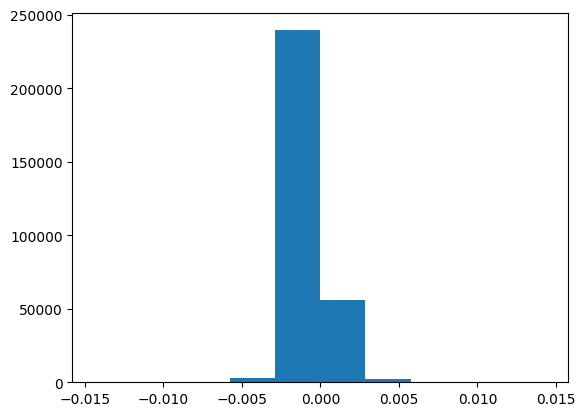

In [19]:

lm = LinearRegression()
lm.fit(X_train, y_train)
plt.hist(lm.coef_[0,:])


(array([6.00000e+00, 3.80000e+01, 5.07000e+02, 2.06360e+04, 8.03911e+05,
        5.84200e+04, 1.14200e+03, 6.80000e+01, 4.00000e+00, 4.00000e+00]),
 array([-4.30976943e-04, -3.37497127e-04, -2.44017327e-04, -1.50537526e-04,
        -5.70577176e-05,  3.64220905e-05,  1.29901891e-04,  2.23381707e-04,
         3.16861522e-04,  4.10341308e-04,  5.03821124e-04]),
 <BarContainer object of 10 artists>)

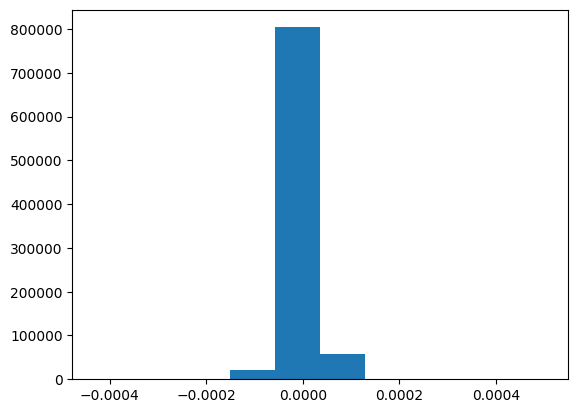

In [17]:
from sklearn.linear_model import Ridge
rd = Ridge(alpha=10000)
rd.fit(X_train, y_train)
plt.hist(rd.coef_[0,:])

In [21]:
from sklearn.ensemble import RandomForestRegressor

# Create a random forest regressor
# regressor = RandomForestRegressor(n_estimators=100, max_depth=5)

# Fit the regressor to the training data
# regressor.fit(X_train, y_train)


In [22]:

# Predict the labels for the test data
# y_pred = regressor.predict(X_test)

In [18]:
# y_pred = lm.predict(X_test)
y_pred = rd.predict(X_test)
# y_pred = lasso.predict(X_test)

In [19]:
corr_list = []
for ccc in range(0,132):
    correlation, _ = pearsonr(y_pred[:,ccc], y_test[:,ccc])
    corr_list.append(correlation)           
    # print("Pearson Correlation:", correlation)
corrDF = np.hstack(corr_list)
print(corrDF)
# Pred_Corr.append(corrDF)
        

[-0.0077215   0.02244342  0.27608796  0.45126089  0.01635385  0.05037839
  0.01910741  0.13469676 -0.01754511  0.40746162  0.18921134 -0.09377402
  0.61697675 -0.11802028 -0.13770402 -0.01987577  0.13371306  0.10115804
  0.47281151  0.4517906  -0.0765518   0.2260117  -0.05479477  0.48156361
  0.01652277  0.08759595  0.05310476 -0.0039059   0.011791    0.19746385
 -0.37401227  0.54703028  0.06548713  0.17432097  0.19661735  0.32661238
 -0.12001056  0.38871365  0.24616099 -0.00264494  0.59706029  0.51646716
  0.37674605  0.51486404  0.02528277  0.20736868  0.04383882 -0.09949393
  0.14625232  0.06232583 -0.29496998  0.19874537  0.16832106  0.59211626
 -0.03003848 -0.09647781  0.18452744  0.32919738 -0.1360503   0.43370703
  0.20721175  0.22219716  0.30566478 -0.29886643  0.58390917  0.56002228
  0.05409783  0.40200683  0.00162645  0.22279504  0.30226156  0.20248653
 -0.21222213  0.26479727  0.07731853  0.2696762   0.40293268  0.11251766
  0.44825556  0.36453466  0.0007695   0.17822533  0

In [32]:
pd.DataFrame(corrDF.reshape(1,-1), columns=np.hstack([met_control.columns[2:], met_control.columns[2:]+"_stress"]))

,hexanoic acid,alanine,valine,urea,ethanolamine,leucine,glycerol,nicotinic acid,isoleucine,proline,...,adenosine_stress,trehalose_stress,maltose_stress,sophorose_stress,melibiose_stress,isomaltose_stress,galactinol_stress,phosphoric acid_stress,Sucrose_stress,Raffinose_stress
0,0.322494,0.526368,0.511907,0.163382,0.218485,0.377959,0.203825,0.304391,0.462303,0.714854,...,0.290851,0.542015,0.100089,0.366585,0.373772,0.141374,0.454411,0.003209,0.368566,0.667929


In [162]:
def lm_reg(modell, image_features_data):

    Pred_Corr = []

    for i in range(1,101):

        print(f"Now is running CV {i}")
        i = str(i)
        cvv = pd.read_csv(f"../../Met/CrossValidation/cv_{i}/met_cv_{i}.csv")
        train_index = cvv.query("Treatment=='Control' and set == 'train'").index
        test_index = cvv.query("Treatment=='Control' and set == 'test'").index

        met_control = pd.read_csv("../../Met/met_rr_control_named.csv")
        met_stress = pd.read_csv("../../Met/met_rr_stress_named.csv")

        labels = zscore(np.hstack([met_control.iloc[:,2:], met_stress.iloc[:,2:]]))
        y = labels 
        X = image_features_data

        y_train = labels[train_index]
        y_test = labels[test_index]
        X_train = X[train_index,:]
        X_test = X[test_index,:]
        print(y_train.shape)
        print(X_train.shape)
        # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

        # lm = LinearRegression()
        # lm.fit(X_train, y_train)

        rd = Ridge(alpha=10000)
        rd.fit(X_train, y_train)

        y_pred = rd.predict(X_test)

        corr_list = []
        for ccc in range(0,132):
            correlation, _ = pearsonr(y_pred[:,ccc], y_test[:,ccc])
            corr_list.append(correlation)           
            # print("Pearson Correlation:", correlation)
        corrDF = np.hstack(corr_list)
        Pred_Corr.append(corrDF)
        
        
    Pred_CorrDF = np.vstack(Pred_Corr)
    Pred_CorrDF = pd.DataFrame(Pred_CorrDF, columns=np.hstack([met_control.columns[2:], met_control.columns[2:]+"_stress"]))
    Pred_CorrDF.to_csv(f"../../temp/DLs/{modell}_RidgeRegression.csv", index = False)

In [163]:
lm_reg(modell="vgg16",
       image_features_data = image_features_data)

Now is running CV 1
(130, 132)
(130, 301056)
Now is running CV 2
(130, 132)
(130, 301056)
Now is running CV 3
(130, 132)
(130, 301056)
Now is running CV 4
(130, 132)
(130, 301056)
Now is running CV 5
(130, 132)
(130, 301056)
Now is running CV 6
(130, 132)
(130, 301056)
Now is running CV 7
(130, 132)
(130, 301056)
Now is running CV 8
(130, 132)
(130, 301056)
Now is running CV 9
(130, 132)
(130, 301056)
Now is running CV 10
(130, 132)
(130, 301056)
Now is running CV 11
(130, 132)
(130, 301056)
Now is running CV 12
(130, 132)
(130, 301056)
Now is running CV 13
(130, 132)
(130, 301056)
Now is running CV 14
(130, 132)
(130, 301056)
Now is running CV 15
(130, 132)
(130, 301056)
Now is running CV 16
(130, 132)
(130, 301056)
Now is running CV 17
(130, 132)
(130, 301056)
Now is running CV 18
(130, 132)
(130, 301056)
Now is running CV 19
(130, 132)
(130, 301056)
Now is running CV 20
(130, 132)
(130, 301056)
Now is running CV 21
(130, 132)
(130, 301056)
Now is running CV 22
(130, 132)
(130, 30105